# Reading the data

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = '/content/gdrive/MyDrive/rafael_ufsc'
images_path = 'images/contrast_transformed_tiles/'
transformation_folder = 'histogram_equalization_gray'
data_csv = 'augmented_light_l.csv'

In [ ]:
os.chdir(root_path)

In [ ]:
df = pd.read_csv(os.path.join(root_path, images_path, data_csv), index_col = 0)
df.groupby('label').count()

,file_path
label,
acumulo,768
contaminacao,224
normal,1000
raleira,400


In [ ]:
import random
random.seed(42)
rows_to_remove = random.sample(df.index[df['label'] == 'normal'].tolist(), 1000 - 224)
df = df.drop(axis = 0, labels = rows_to_remove)
rows_to_remove = (random.sample(df.index[df['label'] == 'acumulo'].tolist(), 768 - 224))
df = df.drop(axis = 0, labels = rows_to_remove)
rows_to_remove = (random.sample(df.index[df['label'] == 'raleira'].tolist(), 400 - 224))
df = df.drop(axis = 0, labels = rows_to_remove)
df.groupby('label').count()

,file_path
label,
acumulo,224
contaminacao,224
normal,224
raleira,224


In [ ]:
images = []
for file in df['file_path']:
    image = cv2.imread(os.path.join(images_path, transformation_folder, file), cv2.IMREAD_GRAYSCALE)
    images.append(image)
df['image'] = images

In [ ]:
df.head()

,file_path,label,image
1,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[253, 251, 250, 250, 249, 248, 246, 244, 245,..."
16,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[101, 133, 105, 89, 127, 118, 103, 148, 90, 1..."
18,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[93, 99, 110, 93, 68, 71, 81, 102, 107, 97, 8..."
24,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[104, 43, 31, 46, 43, 43, 32, 19, 27, 23, 27,..."
26,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[83, 158, 193, 197, 195, 202, 197, 204, 214, ..."


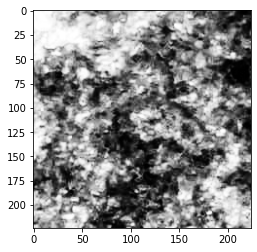

In [ ]:
# plt.imshow(cv2.cvtColor(df.iloc[0]['image'], cv2.COLOR_BGR2RGB))
plt.imshow(df['image'].iloc[0], cmap=plt.cm.gray);

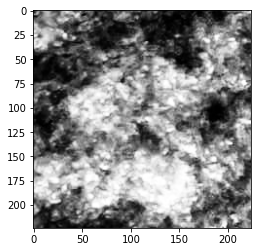

In [ ]:
# acumulo = df[df['label'] == 'acumulo'].iloc[0]['image']
acumulo = df.iloc[42]['image']
# plt.imshow(cv2.cvtColor(acumulo, cv2.COLOR_BGR2RGB));
plt.imshow(acumulo, cmap=plt.cm.gray);

# Wavelets

In [ ]:
import pywt
import pywt.data

## Haar

In [ ]:
haar_1l = []
for image in df['image']:
  coeffs2 = pywt.dwt2(image, 'haar')
  LL, (LH, HL, HH) = coeffs2
  all_coeffs = np.concatenate((LL.ravel(), LH.ravel(), HL.ravel(), HH.ravel()), axis=None)
  haar_1l.append(all_coeffs)
df['haar_1l'] = haar_1l
df.head()

,file_path,label,image,haar_1l
1,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[253, 251, 250, 250, 249, 248, 246, 244, 245,...","[503.00000000000006, 501.50000000000006, 500.5..."
16,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[101, 133, 105, 89, 127, 118, 103, 148, 90, 1...","[229.50000000000006, 195.5, 215.5, 173.0, 236...."
18,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[93, 99, 110, 93, 68, 71, 81, 102, 107, 97, 8...","[198.50000000000003, 194.50000000000006, 160.5..."
24,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[104, 43, 31, 46, 43, 43, 32, 19, 27, 23, 27,...","[146.00000000000003, 71.5, 81.0, 54.0000000000..."
26,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[83, 158, 193, 197, 195, 202, 197, 204, 214, ...","[218.00000000000003, 383.00000000000006, 400.0..."


## Biorthogonal

In [ ]:
bior24_1l = []
for image in df['image']:
  coeffs2 = pywt.dwt2(image, 'bior2.4')
  LL, (LH, HL, HH) = coeffs2
  all_coeffs = np.concatenate((LL.ravel(), LH.ravel(), HL.ravel(), HH.ravel()), axis=None)
  bior24_1l.append(all_coeffs)
df['bior24_1l'] = bior24_1l
df.head()

,file_path,label,image,haar_1l,bior24_1l
1,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[253, 251, 250, 250, 249, 248, 246, 244, 245,...","[503.00000000000006, 501.50000000000006, 500.5...","[511.1334228515624, 501.3411865234375, 496.814..."
16,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[101, 133, 105, 89, 127, 118, 103, 148, 90, 1...","[229.50000000000006, 195.5, 215.5, 173.0, 236....","[85.249267578125, 236.66784667968753, 279.0177..."
18,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[93, 99, 110, 93, 68, 71, 81, 102, 107, 97, 8...","[198.50000000000003, 194.50000000000006, 160.5...","[347.698974609375, 146.1861572265625, 126.5230..."
24,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[104, 43, 31, 46, 43, 43, 32, 19, 27, 23, 27,...","[146.00000000000003, 71.5, 81.0, 54.0000000000...","[51.9556884765625, 88.459228515625, 192.159057..."
26,light/light_fabric/tiles_acumulo_1/acumulo_1_t...,normal,"[[83, 158, 193, 197, 195, 202, 197, 204, 214, ...","[218.00000000000003, 383.00000000000006, 400.0...","[366.8193359375, 169.4400634765625, 100.223754..."


## Multiwavelets: haar and energy
Content Based Image Retrieval using Haar Wavelet to
Extracted Color Histogram and Texture Features: https://ijcsmc.com/docs/papers/August2015/V4I8201542.pdf

Pseudocode:
Algorithm (2): Texture Features Extraction

1. Read image.
2. Image resize to all image in database.
3. Decompose Color image using Haar Wavelet transformation at 1st level ((wavedec2) multilevel 2-D wavelet decomposition).
4. Take Energy for 2-D wavelet decomposition, returns Ea, which is the percentage of energy corresponding to the approximation, and vectors Eh, Ev, Ed, which contain the percentages of energy corresponding to the horizontal, vertical, and diagonal details,
respectively.
5. Repeat the steps from 3 to 4 for three levels.

The multi wavelet is calculated of each image from the database. The multi wavelet decomposed in to 16 sub bands then calculate the energies of 16 sub bands and those energy values are arranged in a row vector.

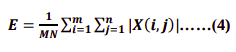

Where M and N are the dimensions of the image, and X is the intensity of the pixel located at row i and column j in the image map. These energy level values are stored to be used in the Swain&Ballard Distance or Euclidean distance algorithm.

This is the multi-wavelet, but I could not implement it in python, so I just used the regular one.
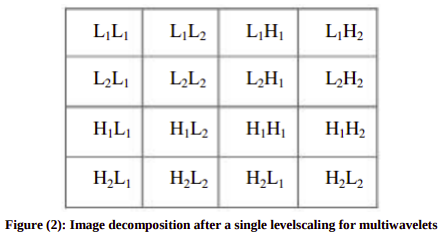

### Haar 3L

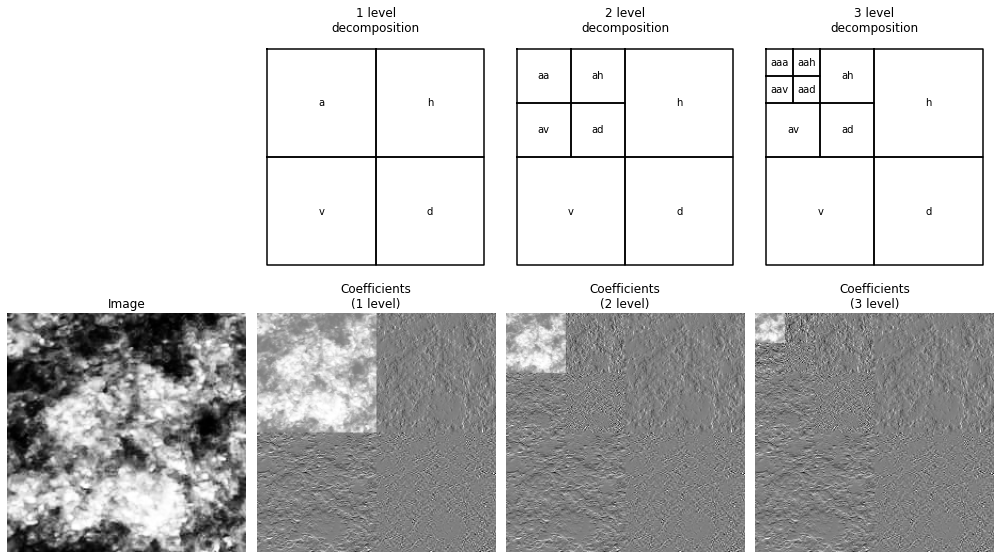

In [ ]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = acumulo.astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the haar DWT
    c = pywt.wavedec2(x, 'haar', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
def calculate_energy(image):
  energy = np.sum(np.abs(image.ravel()))/(len(image)*len(image[0]))
  return (energy)

In [ ]:
def calculate_energy_vector(coeff_arr, coeff_slices):
  energy_vector = []
  for level in range(1, len(coeff_slices)):
    for direction in ['ad', 'da', 'dd']:
      energy_vector.append(calculate_energy(coeff_arr[coeff_slices[level][direction]]))
  return energy_vector

In [ ]:
def calculate_wavelet_and_energy(image_list, wavelet, level):
  energy_list = []
  wavelet_list = []
  for image in image_list:
    x = image.astype(np.float32)
    shape = x.shape
    coefficients = pywt.wavedec2(x, wavelet, mode='periodization', level = level)
    coeff_arr, coeff_slices = pywt.coeffs_to_array(coefficients)
    wavelet_list.append(coeff_arr)
    energy_list.append(calculate_energy_vector(coeff_arr, coeff_slices))
  return wavelet_list, energy_list

In [ ]:
df['haar_3l'], df['energy_3l'] = calculate_wavelet_and_energy(df['image'], 'haar', 3)

### Haar 5L

In [ ]:
df['haar_5l'], df['energy_5l'] = calculate_wavelet_and_energy(df['image'], 'haar', 5)

### Haar 7L

In [ ]:
df['haar_7l'], df['energy_7l'] = calculate_wavelet_and_energy(df['image'], 'haar', 7)

### Bior24 3, 5, and 7L

In [ ]:
df['bior24_3l'], df['energy_b_3l'] = calculate_wavelet_and_energy(df['image'], 'bior2.4', 3)
df['bior24_5l'], df['energy_b_5l'] = calculate_wavelet_and_energy(df['image'], 'bior2.4', 5)
df['bior24_7l'], df['energy_b_7l'] = calculate_wavelet_and_energy(df['image'], 'bior2.4', 7)

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


### Gabor Filters and Wavelets Transform
Comparison Between Gabor Filters and Wavelets Transform for Classification of Textured Images: https://link.springer.com/chapter/10.1007/978-981-15-6403-1_70

1. Choice of the wavelet: In our work, we have used a second order biorthogonal
spline wavelet. This wavelet is often used for texture analysis due to its excellent location in the frequency and spatial domains and its sensitivity to local
singularity and correlation of the image.
2. Calculation of the texture indices: One of the most used indices for characterizing the texture in the spatio-frequency plane is the measurement of energy.
Because the transformed images have different frequencies, orientations and
scales, the energy index is a local measure of the wavelet coefficient distribution according to the frequency, the orientation and the scale. It has been used
successfully for classification and segmentation of textures.
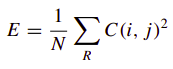
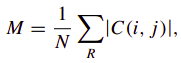

The uppermost good classification rate was attained for a window of 11 × 11
dimension. The estimated features vector of every window is used as an input to the
neural networks classifier for labeling, and the score for the window provided by the
neural networks is allocated to its central pixel.

In [ ]:
# from window_slider import Slider
# import numpy

In [ ]:
# # bior2.4
# whole_image = acumulo
# bucket_size = 11
# overlap_count = 1
# slider = Slider(bucket_size,overlap_count)
# slider.fit(whole_image)       
# while True:
#     window_data = slider.slide()
#     # Perform Wavetlet Transform and calculates Energy and Local Mean
#     coeffs2 = pywt.dwt2(window_data, 'bior2.4')
#     LL, (LH, HL, HH) = coeffs2
#     if slider.reached_end_of_list(): break

# Classification

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [ ]:
 le = LabelEncoder()
 le.fit(df['label'].unique())
 list(le.classes_)

['acumulo', 'contaminacao', 'normal', 'raleira']

In [ ]:
enc_label = le.transform(df['label'])
df['enc_label'] = enc_label
# df.head()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Equalized image with no decomposition

In [ ]:
ravel_imgs = []
for image in df['image']:
  ravel_imgs.append(image.ravel())
df['ravel_image'] = ravel_imgs
df.columns

Index(['file_path', 'label', 'image', 'haar_1l', 'bior24_1l', 'haar_3l',
       'energy', 'haar_5l', 'energy_5l', 'haar_7l', 'energy_7l', 'bior24_3l',
       'energy_b_3l', 'bior24_5l', 'energy_b_5l', 'bior24_7l', 'energy_b_7l',
       'enc_label', 'ravel_image'],
      dtype='object')

In [ ]:
X = df['ravel_image'].values.ravel()
y = df['enc_label'].values
print(X.shape, y.shape)

(896,) (896,)


In [ ]:
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)

(896, 50176) (896,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()


,precision,recall,f1-score,support
0,0.921569,1.000000,0.959184,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,1.000000,0.894737,0.944444,38.000000
3,1.000000,1.000000,1.000000,46.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.980392,0.973684,0.975907,180.000000
weighted avg,0.979521,0.977778,0.977614,180.000000


### Haar

In [ ]:
X = df['haar_1l'].values
y = df['enc_label'].values
print(X.shape, y.shape)

(896,) (896,)


In [ ]:
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)

(896, 50176) (896,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.880000,0.936170,0.907216,47.000000
1,0.980000,1.000000,0.989899,49.000000
2,0.911765,0.815789,0.861111,38.000000
3,1.000000,1.000000,1.000000,46.000000
accuracy,0.944444,0.944444,0.944444,0.944444
macro avg,0.942941,0.937990,0.939557,180.000000
weighted avg,0.944595,0.944444,0.943702,180.000000


### Bior24

In [ ]:
X = df['bior24_1l'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)

(896,) (896,)
(896, 53824) (896,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.937500,0.957447,0.947368,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,0.945946,0.921053,0.933333,38.000000
3,1.000000,1.000000,1.000000,46.000000
accuracy,0.972222,0.972222,0.972222,0.972222
macro avg,0.970861,0.969625,0.970175,180.000000
weighted avg,0.972269,0.972222,0.972183,180.000000


### Haar 3L and energy

In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['haar_3l'].loc[i], df['energy'].loc[i])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound

In [ ]:
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)

(896,) (896,)
(896, 50185) (896,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.886792,1.000000,0.940000,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,1.000000,0.842105,0.914286,38.000000
3,1.000000,1.000000,1.000000,46.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.971698,0.960526,0.963571,180.000000
weighted avg,0.970440,0.966667,0.966238,180.000000


### Haar 5L and energy

In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['haar_5l'].loc[i], df['energy_5l'].loc[i])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

(896,) (896,)
(896, 50191) (896,)


,precision,recall,f1-score,support
0,1.0,1.0,1.0,47.0
1,1.0,1.0,1.0,49.0
2,1.0,1.0,1.0,38.0
3,1.0,1.0,1.0,46.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,180.0
weighted avg,1.0,1.0,1.0,180.0


### Haar 7L and energy


In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['haar_7l'].loc[i], df['energy_7l'].loc[i])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

(896,) (896,)
(896, 50646) (896,)


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,0.974359,1.000000,0.987013,38.000000
3,1.000000,0.978261,0.989011,46.000000
accuracy,0.994444,0.994444,0.994444,0.994444
macro avg,0.993590,0.994565,0.994006,180.000000
weighted avg,0.994587,0.994444,0.994450,180.000000


### Haar 5L without energy

In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['haar_5l'].loc[i], [])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

(896,) (896,)
(896, 50176) (896,)


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,0.974359,1.000000,0.987013,38.000000
3,1.000000,0.978261,0.989011,46.000000
accuracy,0.994444,0.994444,0.994444,0.994444
macro avg,0.993590,0.994565,0.994006,180.000000
weighted avg,0.994587,0.994444,0.994450,180.000000


### Bior24 3L and energy

In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['bior24_3l'].loc[i], df['energy_b_3l'].loc[i])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

(896,) (896,)
(896, 50185) (896,)


,precision,recall,f1-score,support
0,0.916667,0.936170,0.926316,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,0.894737,0.894737,0.894737,38.000000
3,1.000000,0.978261,0.989011,46.000000
accuracy,0.955556,0.955556,0.955556,0.955556
macro avg,0.952851,0.952292,0.952516,180.000000
weighted avg,0.956019,0.955556,0.955730,180.000000


### Bior24 5L and energy

In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['bior24_5l'].loc[i], df['energy_b_5l'].loc[i])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

(896,) (896,)
(896, 50191) (896,)


,precision,recall,f1-score,support
0,1.0,1.0,1.0,47.0
1,1.0,1.0,1.0,49.0
2,1.0,1.0,1.0,38.0
3,1.0,1.0,1.0,46.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,180.0
weighted avg,1.0,1.0,1.0,180.0


### Bior24 7L and energy

In [ ]:
haar_compound = []
for i in df.index:
  image, energy = (df['bior24_7l'].loc[i], df['energy_b_7l'].loc[i])
  haar_compound.append(np.concatenate((image.ravel(), np.array(energy).ravel()), axis=None))
df['haar_compound'] = haar_compound
X = df['haar_compound'].values
y = df['enc_label'].values
print(X.shape, y.shape)
X = np.stack(X)
y = np.stack(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
pandas.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()

(896,) (896,)
(896, 50646) (896,)


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,47.000000
1,1.000000,1.000000,1.000000,49.000000
2,0.974359,1.000000,0.987013,38.000000
3,1.000000,0.978261,0.989011,46.000000
accuracy,0.994444,0.994444,0.994444,0.994444
macro avg,0.993590,0.994565,0.994006,180.000000
weighted avg,0.994587,0.994444,0.994450,180.000000
